In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [88]:
data_df = pd.read_csv('aug_train.csv')
data_df = data_df[0:1000].copy()
data = data_df.copy()

In [89]:
data.shape

(1000, 14)

In [90]:
display(data_df.head())

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [91]:
#Buliding Models
#For Gradient Boosting Classifier, we used scikit-learn library (written as sklearn in coding) and xgboost for XGBoost Classifier.
#For our analysis, we are using two modeling techniques and for both we are using StratifiedKFold cross validation to correctly represents the test folds for the minority class and to validate the same with StratifiedKFold for our techniques.

In [92]:
#A) Gradient Boosting Model
#from sklearn.ensemble import GradientBoostingClassifier
#gbc_model = GradientBoostingClassifier()
#folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
#scores = cross_val_score(gbc_model, X_smote, y_smote, scoring='accuracy', cv=folds)
#scores

In [93]:
data_df.drop("enrollee_id", axis=1, inplace=True)

In [94]:
data_df.shape

(1000, 13)

In [95]:
data_df.info

<bound method DataFrame.info of          city  city_development_index  gender      relevent_experience  \
0    city_103                   0.920    Male  Has relevent experience   
1     city_40                   0.776    Male   No relevent experience   
2     city_21                   0.624     NaN   No relevent experience   
3    city_115                   0.789     NaN   No relevent experience   
4    city_162                   0.767    Male  Has relevent experience   
..        ...                     ...     ...                      ...   
995   city_21                   0.624     NaN  Has relevent experience   
996  city_103                   0.920  Female   No relevent experience   
997   city_73                   0.754    Male  Has relevent experience   
998   city_40                   0.776    Male   No relevent experience   
999  city_103                   0.920    Male  Has relevent experience   

    enrolled_university education_level major_discipline experience  \
0       

In [96]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
city_development_index,1000.0,0.829222,0.121018,0.479,0.754,0.898,0.92,0.949
training_hours,1000.0,64.371000,59.947770,2.000,22.000,45.000,90.00,332.000
target,1000.0,0.230000,0.421043,0.000,0.000,0.000,0.00,1.000


In [97]:
#Cleaning the data

data_df.isnull().sum()

city                        0
city_development_index      0
gender                    231
relevent_experience         0
enrolled_university        27
education_level            28
major_discipline          151
experience                  2
company_size              295
company_type              310
last_new_job               17
training_hours              0
target                      0
dtype: int64

In [98]:
num_cols = data_df.select_dtypes(["float64","int64"])
cat_cols = data_df.select_dtypes(["object"])

for col in num_cols.columns:
    data_df[col].fillna(data_df[col].median(), inplace=True)

for col in cat_cols.columns:
    data_df[col].fillna(data_df[col].mode().values[0], inplace=True)

In [99]:
data_df.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [100]:
#Handling duplicates

data_df.duplicated().sum()

1

In [101]:
data_df.drop_duplicates(inplace=True)

In [102]:
X = data_df.drop("target", axis=1)
y = data_df["target"]

y = pd.DataFrame(y, columns=["target"])

In [103]:
#Data Standartization

X_num_cols  = X.select_dtypes(["float64","int64"])
X_cat_cols  = X.select_dtypes(["object"])

ss = StandardScaler()
X[X_num_cols.columns] = ss.fit_transform(X[X_num_cols.columns])

In [104]:
#One hot encoding

X = pd.get_dummies(X, columns=X_cat_cols.columns)

In [105]:
#Train Tset Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
#Machine Learning Models

models = pd.DataFrame(columns=["Models","Accuracy Score"])

In [107]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
score = accuracy_score(predictions, y_test)
print("LogisticRegression: ", score)

new_row = {"Models": "LogisticRegression", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

LogisticRegression:  0.8


In [108]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
predictions = GNB.predict(X_test)
score = accuracy_score(predictions, y_test)
print("GaussianNB: ", score)

new_row = {"Models": "GaussianNB", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

GaussianNB:  0.28


In [109]:
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
predictions = BNB.predict(X_test)
score = accuracy_score(predictions, y_test)
print("BernoulliNB: ", score)

new_row = {"Models": "BernoulliNB", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

BernoulliNB:  0.775


In [110]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
score = accuracy_score(predictions, y_test)
print("SVC: ", score)

new_row = {"Models": "SVC", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

SVC:  0.835


In [111]:
randomforest = RandomForestClassifier(n_estimators=1000, random_state=42)
randomforest.fit(X_train, y_train)
predictions = randomforest.predict(X_test)
score = accuracy_score(predictions, y_test)
print("RandomForestClassifier: ", score)

new_row = {"Models": "RandomForestClassifier", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

RandomForestClassifier:  0.83


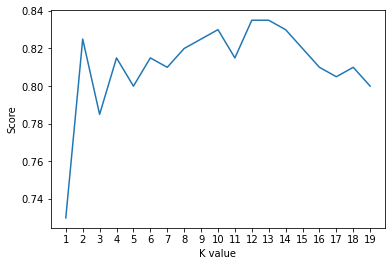

In [113]:
score_list = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    score_list.append(accuracy_score(y_test, predictions))

plt.plot(range(1, 20), score_list)
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [114]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(predictions, y_test)
print("KNeighborsClassifier: ", score)

new_row = {"Models": "KNeighborsClassifier", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

KNeighborsClassifier:  0.805


In [115]:
#Comparison of Machine Learning Models

models.sort_values(by="Accuracy Score", ascending=False)

,Models,Accuracy Score
3,SVC,0.835
4,RandomForestClassifier,0.830
5,KNeighborsClassifier,0.805
0,LogisticRegression,0.800
2,BernoulliNB,0.775
1,GaussianNB,0.280
